In [28]:
from torchdiffeq import odeint
import numpy as np
import torch
import matplotlib.pyplot as plt

In [32]:
def logistic_growth(t, z, a_x, b_x, a_y, b_y):
    """
    Same function as we used for the SciPy example.
    Note the difference in using torch.tensor return value.
    """
    x, y = z
    dxdt = a_x * (b_x - x)
    dydt = a_y * (b_y - y)
    return torch.tensor([dxdt, dydt])

In [36]:
class ODESystem(torch.nn.Module):
    """
    PyTorch class for an ODE System,
    which enables us to numerically solve
    it via torchdiffeq.
    """
    def __init__(self, a_x, b_x, a_y, b_y):
        super(ODESystem, self).__init__()
        self.a_x = a_x
        self.b_x = b_x
        self.a_y = a_y
        self.b_y = b_y

    def forward(self, t, z):
        return logistic_growth(t, z, self.a_x, self.b_x, self.a_y, self.b_y)

In [37]:
# define our time axis
# in this case we explicitly define
# both t_span and t_eval, though this isn't always needed
ti = 0
tf = 15
t_span = [ti, tf]
t_eval= torch.linspace(ti, tf, 300)

# parameters
a_x = torch.tensor(0.5)
b_x = torch.tensor(100)
a_y = torch.tensor(0.25)
b_y = torch.tensor(200)

# initial conditions
initial_conditions = torch.tensor([3.0, 2.0])

In [38]:
ode_func = ODESystem(a_x, b_x, a_y, b_y)
sol = odeint(ode_func, initial_conditions, t_eval)

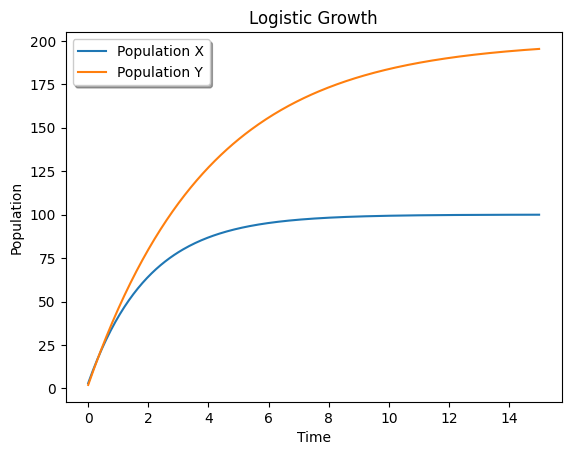

In [31]:
plt.plot(t_eval.detach().numpy(), sol.detach().numpy())
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(['Population X', 'Population Y'], shadow=True)
plt.title('Logistic Growth')
plt.show()